### Cell 1: Import necessary libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cell 2: Set up parameters

In [2]:
# Define the assets, time period, and output file name here.
# This makes it easy to modify the script for other assets or timeframes in the future.

# Tickers for S&P 500 Index and EUR/USD exchange rate on Yahoo Finance
tickers = ['^GSPC', 'EUR=X']

# Define the sample period
start_date = '2007-01-01'
end_date = '2025-06-01'  # Set one day after the desired end date to ensure the last day is included

# Define the output file name for the cleaned data
output_file = 'spx_eurusd_daily_data.csv'


### Cell 3: Download historical price data

In [4]:
# Use yfinance.download to fetch the data for the specified tickers and date range.
# We are interested in the 'Adj Close' price, which accounts for dividends and stock splits.

print(f"Downloading daily data for {tickers} from {start_date} to {end_date}...")
price_data = yf.download(tickers, start=start_date, end=end_date)['Close']
print("Data download complete.")


C:\Users\rjx10\AppData\Local\Temp\ipykernel_20584\2760322440.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Data download complete.


### Cell 4: Clean and process the data

In [5]:
# This is a crucial step to ensure data quality and consistency.

# Rename columns for clarity
price_data.rename(columns={'^GSPC': 'SPX', 'EUR=X': 'EURUSD'}, inplace=True)

# Handle non-common trading days by dropping rows with any missing values.
# This ensures that both time series are perfectly aligned day-by-day.
original_rows = len(price_data)
price_data_aligned = price_data.dropna()
cleaned_rows = len(price_data_aligned)
print(f"Data aligned. Original rows: {original_rows}, Aligned rows: {cleaned_rows}.")

# Calculate continuously compounded (log) returns
# r_t = ln(P_t / P_{t-1})
return_data_aligned = np.log(price_data_aligned / price_data_aligned.shift(1))
# Rename return columns
return_data_aligned.rename(columns={'SPX': 'SPX_Return', 'EURUSD': 'EURUSD_Return'}, inplace=True)

# Combine price and return data into a single DataFrame
final_data = pd.concat([price_data_aligned, return_data_aligned], axis=1)

# Drop the first row which will have NaN values for returns
final_data = final_data.dropna()


Data aligned. Original rows: 4803, Aligned rows: 4604.


### Cell 5: Save the processed data to a CSV file

In [6]:
final_data.to_csv(output_file)
print(f"Cleaned data saved successfully to '{output_file}'.")

Cleaned data saved successfully to 'spx_eurusd_daily_data.csv'.


### Cell 6: Verify and visualize the data


--- Data Preview (First 5 Rows) ---
Ticker       EURUSD          SPX  EURUSD_Return  SPX_Return
Date                                                       
2007-01-04  0.76377  1418.339966       0.005949    0.001228
2007-01-05  0.77012  1409.709961       0.008280   -0.006103
2007-01-08  0.76687  1412.839966      -0.004229    0.002218
2007-01-09  0.76941  1412.109985       0.003307   -0.000517
2007-01-10  0.77280  1414.849976       0.004396    0.001938

--- Summary Statistics of Returns ---
Ticker   SPX_Return  EURUSD_Return
count   4603.000000    4603.000000
mean       0.000310       0.000032
std        0.012681       0.007348
min       -0.127652      -0.159632
25%       -0.004220      -0.003278
50%        0.000711       0.000000
75%        0.005986       0.003231
max        0.109572       0.143324

Plotting normalized price series for visual verification...


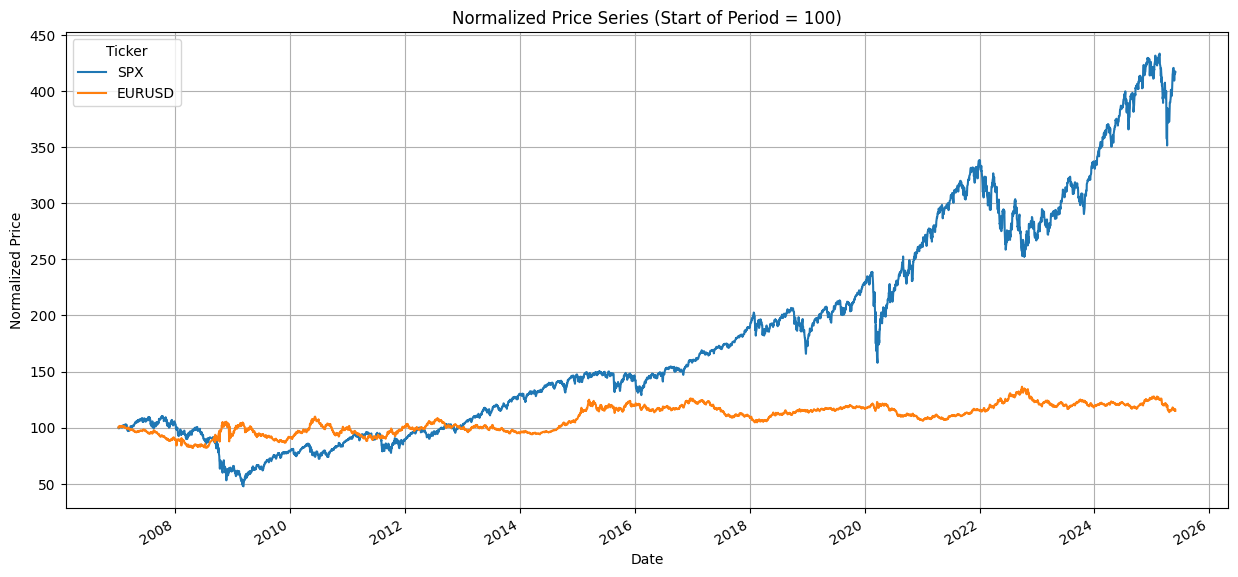

In [7]:
print("\n--- Data Preview (First 5 Rows) ---")
print(final_data.head())
print("\n--- Summary Statistics of Returns ---")
print(final_data[['SPX_Return', 'EURUSD_Return']].describe())
print("\nPlotting normalized price series for visual verification...")
(final_data[['SPX', 'EURUSD']] / final_data[['SPX', 'EURUSD']].iloc[0] * 100).plot(
    figsize=(15, 7),
    title='Normalized Price Series (Start of Period = 100)',
    grid=True
)
plt.ylabel('Normalized Price')
plt.show()